In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance

In [4]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [375]:
# choose columns for detect outliers and clip operation

print(data.isnull().sum())
print('Non uniqe values:')
print(data.nunique())
data.columnss=data[['Age','Annual_Premium','Vintage']]

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
Non uniqe values:
id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64


<ipython-input-375-b8c0807b6328>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.columnss=data[['Age','Annual_Premium','Vintage']]


In [376]:
#detect outliers and clip operation

x=[]
y=[]

for columnname in data.columns:
    
    if data.columns != 
    
    q3=data[columnname].quantile(0.75)
    q1=data[columnname].quantile(0.25)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    outlier_count=data[data[columnname]<lower_bound].shape[0]+data[data[columnname]>upper_bound].shape[0]
    data[columnname].clip(lower_bound,upper_bound,inplace=True)
    outlier_count2=data[data[columnname]<lower_bound].shape[0]+data[data[columnname]>upper_bound].shape[0]

    print('Column:'+' '+columnname.title(),'iqr:'+' '+str(iqr), 'lower bound:'+' '+str(lower_bound),
    'upper bound:'+' '+str(upper_bound),'outlier sayı:' + ' '+str(outlier_count),'clip sonrası outlier sayı:'+' '+
    str(outlier_count2))

    xx=['Column:','iqr:','lower bound:','upper bound:','outlier sayı:','clip sonrası outlier sayı :']
    yy=[columnname.title(),str(iqr),str(lower_bound),str(upper_bound),str(outlier_count),str(outlier_count2)]

    for i in range(6):

        x.append(xx[i])
        y.append(yy[i])

Column: Age iqr: 24.0 lower bound: -11.0 upper bound: 85.0 outlier sayı: 0 clip sonrası outlier sayı: 0
Column: Annual_Premium iqr: 14995.0 lower bound: 1912.5 upper bound: 61892.5 outlier sayı: 10320 clip sonrası outlier sayı: 0
Column: Vintage iqr: 145.0 lower bound: -135.5 upper bound: 444.5 outlier sayı: 0 clip sonrası outlier sayı: 0


In [377]:
#to make a dataframe for information about outliers 

y=np.array(y).reshape(3,6)

df = pd.DataFrame(y,index=[0,1,2],columns=['col','iqr','lower_bound','upper_bound','outlier sayı','clip sonrası outlier sayı'])
df

,col,iqr,lower_bound,upper_bound,outlier sayı,clip sonrası outlier sayı
0,Age,24.0,-11.0,85.0,0,0
1,Annual_Premium,14995.0,1912.5,61892.5,10320,0
2,Vintage,145.0,-135.5,444.5,0,0


In [378]:
#split dataset (Response=1 and Response=0)

datares1=data.query('Response==1')
datares0=data.query('Response==0')

In [379]:
# choose columns for average calculate

datares1avg=datares1[['Age','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Vintage']]

datares0avg=datares0[['Age','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Vintage']]



In [380]:
# replace and convert string to numeric

#into Response=1 

datares1avg.replace({'Vehicle_Age' : { '< 1 Year' : '0', '1-2 Year' : '1','> 2 Years' : '2'}}, inplace=True)
datares1avg.replace({'Vehicle_Damage' : { 'Yes' : '1', 'No' : '0'}},inplace=True)

datares1avg['Vehicle_Age'] = pd.to_numeric(datares1avg['Vehicle_Age'])
datares1avg['Vehicle_Damage'] = pd.to_numeric(datares1avg['Vehicle_Damage'])

#into Response=10

datares0avg.replace({'Vehicle_Age' : { '< 1 Year' : '0', '1-2 Year' : '1','> 2 Years' : '2'}}, inplace=True)
datares0avg.replace({'Vehicle_Damage' : { 'Yes' : '1', 'No' : '0'}},inplace=True)

datares0avg['Vehicle_Age'] = pd.to_numeric(datares0avg['Vehicle_Age'])
datares0avg['Vehicle_Damage'] = pd.to_numeric(datares0avg['Vehicle_Damage'])


c:\Users\qw\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-380-46053087fcd3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datares1avg['Vehicle_Age'] = pd.to_numeric(datares1avg['Vehicle_Age'])
<ipython-input-380-46053087fcd3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [381]:
# averages of datasets (Response_1, Response_0)

mean_x=[]
mean_y=[]

mean_x.append(datares1avg.mean())
mean_y.append(datares0avg.mean())

df_mean_x=pd.DataFrame(mean_x)

df_means = df_mean_x.append(mean_y)

indexx = pd.Index(['Response_1', 'Response_0'])

df_means = df_means.set_index(indexx)
df_means

,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage
Response_1,43.435560,0.999122,0.003383,0.946478,0.978977,31061.411807,154.112246
Response_0,38.178227,0.997694,0.521742,0.562561,0.438653,30020.604513,154.380243


In [382]:
# std of datasets (Response_1, Response_0)

std_x=[]
std_y=[]

std_x.append(datares1avg.std())
std_y.append(datares0avg.std())

df_std_x=pd.DataFrame(std_x)

df_std = df_std_x.append(std_y)

indexx = pd.Index(['Response_1', 'Response_0'])
df_std = df_std.set_index(indexx)
df_std

,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage
Response_1,12.168924,0.029614,0.058062,0.501986,0.143464,16332.816139,83.738574
Response_0,15.816052,0.047962,0.499528,0.560090,0.496223,15348.669662,83.661975


In [383]:
# choose columns for skewness, kurtosis and histogram

#response=1
datares1dist=datares1avg[['Age','Annual_Premium','Vintage']]

# response=0
datares0dist=datares0avg[['Age','Annual_Premium','Vintage']]


In [384]:
# Kurtosis of dataset columns (Response_1, Response_0)

kurt_x=[]
kurt_y=[]

kurt_x.append(sc.stats.kurtosis(datares1dist))
kurt_y.append(sc.stats.kurtosis(datares0dist))

df_kurt_x=pd.DataFrame(kurt_x)

df_kurt = df_kurt_x.append(kurt_y)

df_kurt.columns=['Age','Annual_Premium','Vintage']

indexx = pd.Index(['Response_1', 'Response_0'])
df_kurt = df_kurt.set_index(indexx)
df_kurt


,Age,Annual_Premium,Vintage
Response_1,-0.096421,-0.440762,-1.198050
Response_0,-0.530325,-0.238017,-1.201065


In [385]:
# Skewness of dataset columns (Response_1, Response_0)

skew_x=[]
skew_y=[]

skew_x.append(sc.stats.skew(datares1dist))
skew_y.append(sc.stats.skew(datares0dist))

df_kurt_x=pd.DataFrame(skew_x)

df_skew = df_skew_x.append(skew_y)

df_skew.columns=['Age','Annual_Premium','Vintage']

indexx = pd.Index(['Response_1', 'Response_0'])
df_skew = df_skew.set_index(indexx)
df_skew

,Age,Annual_Premium,Vintage
Response_1,0.322440,-0.402862,0.001003
Response_0,0.749022,-0.350062,0.003315


Age


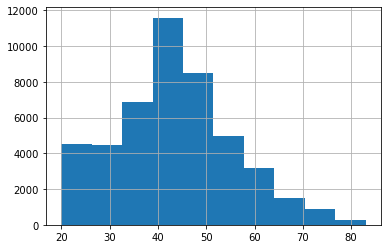

Annual_Premium


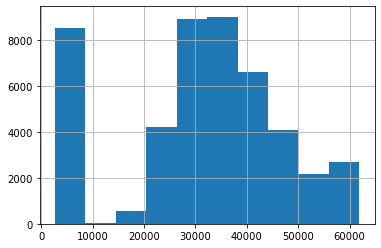

Vintage


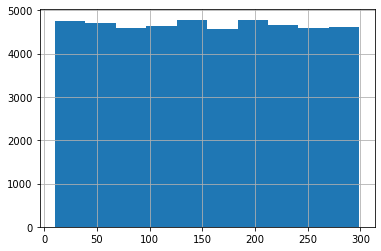

In [386]:
# columns histograms for response=1

for c in datares1dist:
	if str(datares1dist.dtypes[c]) in ['int64', 'float64']:
		print(c)
		datares1dist[c].hist()
		plt.show()

Age


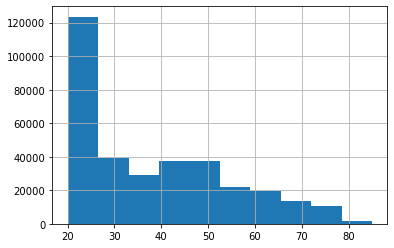

Annual_Premium


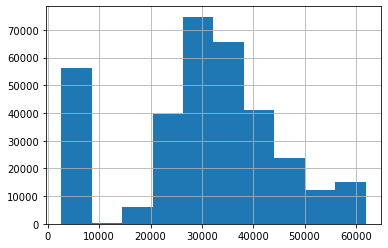

Vintage


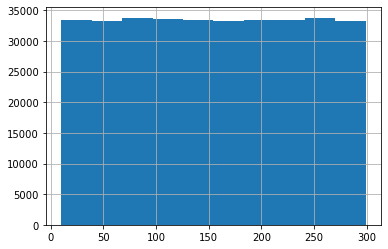

In [387]:
# columns histograms for response=0

for c in datares0dist:
	if str(datares0dist.dtypes[c]) in ['int64', 'float64']:
		print(c)
		datares0dist[c].hist()
		plt.show()

In [388]:
# choose random row (response=1) for find similarity with mean of data (response=0)

sim_row_res1=datares1avg.iloc[np.random.randint(len(datares1avg)),:]

# mean of columns in the dataset (response=0)

sim_mean_row_res0=df_means.loc['Response_0']

In [389]:
sim_row_res1

Age                     41.0
Driving_License          1.0
Previously_Insured       0.0
Vehicle_Age              2.0
Vehicle_Damage           1.0
Annual_Premium        2630.0
Vintage                209.0
Name: 117718, dtype: float64

In [390]:
sim_mean_row_res0

Age                      38.178227
Driving_License           0.997694
Previously_Insured        0.521742
Vehicle_Age               0.562561
Vehicle_Damage            0.438653
Annual_Premium        30020.604513
Vintage                 154.380243
Name: Response_0, dtype: float64

In [391]:
# distances random row of data(response=1) with mean of data(response=0)

print(distance.cosine(sim_row_res1, sim_mean_row_res0))
print(distance.euclidean(sim_row_res1, sim_mean_row_res0))

0.0028503307006748635
27390.659165386292


In [392]:
# choose random row (response=0) for find similarity with mean of data (response=1)

sim_row_res0=datares0avg.iloc[np.random.randint(len(datares0avg)),:]

# mean of columns in the dataset (response=1)

sim_mean_row_res1=df_means.loc['Response_1']

In [393]:
# distances random row of data(response=0) and mean data(response=1)

print(distance.cosine(sim_row_res0, sim_mean_row_res1))
print(distance.euclidean(sim_row_res0, sim_mean_row_res1))

2.439616469174233e-06
5663.828739763388
